In [19]:
!pip install pandas beautifulsoup4 matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 1.5 MB/s eta 0:00:001.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 6.3 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 15.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.3 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 23.7 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 6.9 MB/s eta 0:00:00


In [28]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from time import sleep

In [33]:
data = []
fetch_images = False

user_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36 Edg/91.0.864.67",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.1 Safari/605.1.15",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:89.0) Gecko/20100101 Firefox/89.0",
    "Mozilla/5.0 (Linux; Android 10; SM-G975F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Mobile Safari/537.36",
    "Mozilla/5.0 (Android 10; Mobile; rv:89.0) Gecko/89.0 Firefox/89.0",
    "Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.1 Mobile/15E148 Safari/604.1",
    "Mozilla/5.0 (iPad; CPU OS 14_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.1 Mobile/15E148 Safari/604.1"
]


for i in range(1000):
    error = False
    # sleep(2)
    print(i)
    # Define the URL to scrape
    base_url = "https://www.vivareal.com.br"
    url = base_url + f"/venda/santa-catarina/florianopolis/?pagina={i + 1}#onde=,Santa%20Catarina,Florian%C3%B3polis,,,,,city,BR%3ESanta%20Catarina%3ENULL%3EFlorianopolis,-27.594808,-48.556915,&itl_id=1000183&itl_name=vivareal_-_botao-cta_buscar_to_vivareal_resultado-pesquisa"

    while not error:
        user_agent_c = 0
        # Set the desired user agent
        headers = {
            "User-Agent": user_agents[user_agent_c]
        }
        
        try:
            # Send an HTTP request with the specified user agent
            response = requests.get(url, headers=headers)
            soup = BeautifulSoup(response.content, "html.parser")
            
            # Find the relevant table containing property data
            table = soup.find("div", attrs={"class": "results-list js-results-list"})
            
            rows = table.find_all("div", class_="js-card-selector")
            
            for row in rows:
                info = row.find
            
                anuncio_url = (
                    base_url +
                    row.find(class_="property-card__labels-container js-main-info js-listing-labels-link").get("href")
                )

                # Image data is not working because the website throttle the crawler and prevent more ingestions
                
                # if fetch_images:
                #     anuncio_resp = requests.get(anuncio_url, headers=headers)
                #     anuncio_soup = BeautifulSoup(anuncio_resp.content, "html.parser")
                
                #     images_ul = anuncio_soup.find(class_="carousel__container js-carousel-scroll")
                #     images_data = []
                    
                #     for image in images_ul:
                #         image_tag = image.find("img")
                #         if not isinstance(image_tag, int):
                #             images_data.append({
                #                 "alt": image_tag.get("alt"),
                #                 "src": image_tag.get("src")
                #             })
                
                data.append({
                    "title": row.find(class_="property-card__title js-cardLink js-card-title").text.strip(),
                    
                    # "imagens": images_data if fetch_images else [],
                    
                    "url": anuncio_url,
                    
                    "endereco": row.find(class_="property-card__address").text.strip(),
                    
                    "area": row.find(class_="property-card__detail-item property-card__detail-area").find(class_="property-card__detail-value js-property-card-value property-card__detail-area js-property-card-detail-area").text.strip(),
                    "area_label": row.find(class_="property-card__detail-item property-card__detail-area").find(class_="property-card__detail-text js-property-card-detail-text").text.strip(),
                    
                    "quartos": row.find(class_="property-card__detail-item property-card__detail-room js-property-detail-rooms").find(class_="property-card__detail-value js-property-card-value").text.strip(),
                    "quartos_label": row.find(class_="property-card__detail-item property-card__detail-room js-property-detail-rooms").find(class_="property-card__detail-text js-property-card-detail-text").text.strip(),
                    
                    "banheiros": row.find(class_="property-card__detail-item property-card__detail-bathroom js-property-detail-bathroom").find(class_="property-card__detail-value js-property-card-value").text.strip(),
                    "banheiros_label": row.find(class_="property-card__detail-item property-card__detail-bathroom js-property-detail-bathroom").find(class_="property-card__detail-text js-property-card-detail-text").text.strip(),
                    
                    "vagas": row.find(class_="property-card__detail-item property-card__detail-garage js-property-detail-garages").find(class_="property-card__detail-value js-property-card-value").text.strip(),
                    "vagas_label": row.find(class_="property-card__detail-item property-card__detail-garage js-property-detail-garages").find(class_="property-card__detail-text js-property-card-detail-text").text.strip(),
                    
                    "preco": row.find(class_="property-card__price js-property-card-prices js-property-card__price-small").p.text.strip(),
                    
                    "fonte": url
                })
        except Exception as e:
            print(f"Error ingesting url: {anuncio_url}, Error: {e}")
            if user_agent_c < len(user_agents) - 1:
                user_agent_c += 1
                headers = {
                    "User-Agent": user_agents[user_agent_c]
                }
            else: 
                error = True
                break
            
            sleep(10)

0
Error ingesting url: https://www.vivareal.com.br/imovel/casa-3-quartos-corrego-grande-bairros-florianopolis-com-garagem-199m2-venda-RS1800000-id-2700846376/, Error: 'NoneType' object has no attribute 'find_all'
Error ingesting url: https://www.vivareal.com.br/imovel/casa-3-quartos-corrego-grande-bairros-florianopolis-com-garagem-199m2-venda-RS1800000-id-2700846376/, Error: 'NoneType' object has no attribute 'find_all'
Error ingesting url: https://www.vivareal.com.br/imovel/casa-3-quartos-corrego-grande-bairros-florianopolis-com-garagem-199m2-venda-RS1800000-id-2700846376/, Error: 'NoneType' object has no attribute 'find_all'
Error ingesting url: https://www.vivareal.com.br/imovel/casa-3-quartos-corrego-grande-bairros-florianopolis-com-garagem-199m2-venda-RS1800000-id-2700846376/, Error: 'NoneType' object has no attribute 'find_all'
Error ingesting url: https://www.vivareal.com.br/imovel/casa-3-quartos-corrego-grande-bairros-florianopolis-com-garagem-199m2-venda-RS1800000-id-270084637

KeyboardInterrupt: 

In [13]:
data

[{'title': 'Apartamento com 2 Quartos à Venda, 77m²',
  'url': 'https://www.vivareal.com.br/imovel/apartamento-2-quartos-ingleses-do-rio-vermelho-bairros-florianopolis-com-garagem-77m2-venda-RS589000-id-2722640377/',
  'endereco': 'Rua das Gaivotas, 230 - Ingleses do Rio Vermelho, Florianópolis - SC',
  'area': '77',
  'area_label': 'm²',
  'quartos': '2',
  'quartos_label': 'Quartos',
  'banheiros': '1',
  'banheiros_label': 'Banheiro',
  'vagas': '1',
  'vagas_label': 'Vaga',
  'preco': 'R$ 589.000',
  'fonte': 'https://www.vivareal.com.br/venda/santa-catarina/florianopolis/?pagina=1#onde=,Santa%20Catarina,Florian%C3%B3polis,,,,,city,BR%3ESanta%20Catarina%3ENULL%3EFlorianopolis,-27.594808,-48.556915,&itl_id=1000183&itl_name=vivareal_-_botao-cta_buscar_to_vivareal_resultado-pesquisa'},
 {'title': 'RESIDENCIAL BACK GREEN TOWERS - 92m²',
  'url': 'https://www.vivareal.com.br/imoveis-lancamento/residencial-back-green-towers-92m-2569358347/',
  'endereco': 'Rua Trajano Margarida, 180 - Tr

In [25]:
df = pd.DataFrame(data)

In [26]:
df

,title,url,endereco,area,area_label,quartos,quartos_label,banheiros,banheiros_label,vagas,vagas_label,preco,fonte
0,"Casa com 3 Quartos à Venda, 80m²",https://www.vivareal.com.br/imovel/casa-3-quar...,"Estrada Dom João Becker, 277 - Ingleses do Rio...",80,m²,3,Quartos,2,Banheiros,1,Vaga,R$ 450.000,https://www.vivareal.com.br/venda/santa-catari...
1,D/Nex Smart Living 74m² (Apto. 202),https://www.vivareal.com.br/imoveis-lancamento...,"Avenida Marinheiro Max Schramm, 2701 - Jardim ...",74,m²,2,Quartos,2,Banheiros,2,Vagas,R$ 919.482,https://www.vivareal.com.br/venda/santa-catari...
2,"Apartamento com 2 Quartos à Venda, 77m²",https://www.vivareal.com.br/imovel/apartamento...,"Rua das Gaivotas, 230 - Ingleses do Rio Vermel...",77,m²,2,Quartos,1,Banheiro,1,Vaga,R$ 589.000,https://www.vivareal.com.br/venda/santa-catari...
3,"Casa com 3 Quartos à Venda, 110m²",https://www.vivareal.com.br/imovel/casa-3-quar...,"Servidão Maurílio Nunes, 50 - São João do Rio ...",110,m²,3,Quartos,3,Banheiros,3,Vagas,R$ 459.000 Preço abaixo do mercado,https://www.vivareal.com.br/venda/santa-catari...
4,"Apartamento com 3 Quartos à Venda, 66m²",https://www.vivareal.com.br/imovel/apartamento...,"Rua Doutor Abel Capela, 863 - Coqueiros, Flori...",66,m²,3,Quartos,1,Banheiro,1,Vaga,R$ 340.000,https://www.vivareal.com.br/venda/santa-catari...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,"Lote/Terreno à Venda, 613m²",https://www.vivareal.com.br/imovel/lote-terren...,"Jurerê, Florianópolis - SC",613,m²,--,Quarto,--,Banheiro,--,Vaga,R$ 3.000.000,https://www.vivareal.com.br/venda/santa-catari...
356,"Casa com 3 Quartos à Venda, 170m²",https://www.vivareal.com.br/imovel/casa-3-quar...,"Rua José Elias Lopes, 969 - Campeche, Florianó...",170,m²,3,Quartos,3,Banheiros,3,Vagas,R$ 1.350.000,https://www.vivareal.com.br/venda/santa-catari...
357,"Apartamento com 3 Quartos à Venda, 88m²",https://www.vivareal.com.br/imovel/apartamento...,"Rua Sílvio Possobon - Abraão, Florianópolis - SC",88,m²,3,Quartos,2,Banheiros,1,Vaga,R$ 848.000,https://www.vivareal.com.br/venda/santa-catari...
358,"Apartamento com Quarto à Venda, 55m²",https://www.vivareal.com.br/imovel/apartamento...,"Rua Lauro Linhares, 770 - Trindade, Florianópo...",55,m²,1,Quarto,1,Banheiro,1,Vaga,R$ 649.310,https://www.vivareal.com.br/venda/santa-catari...


In [17]:
df.to_json("2024-06-20_vivareal_3krow.json", orient="records")

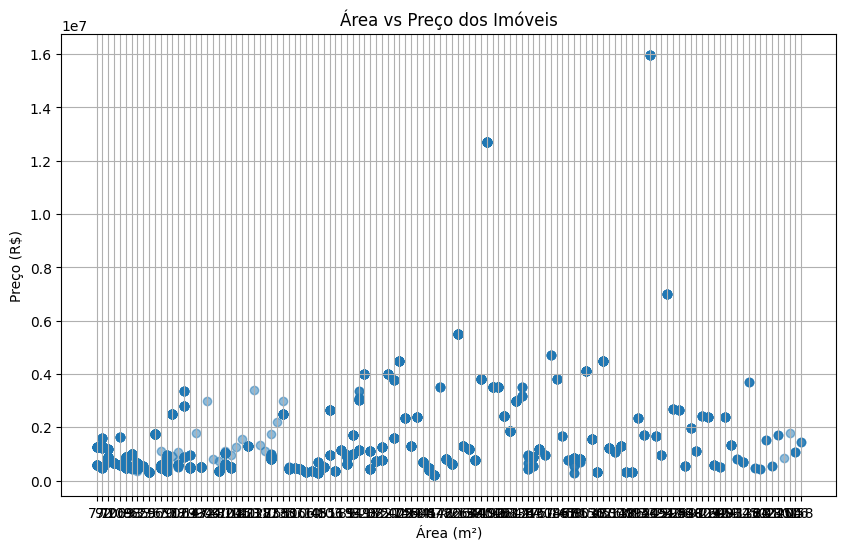

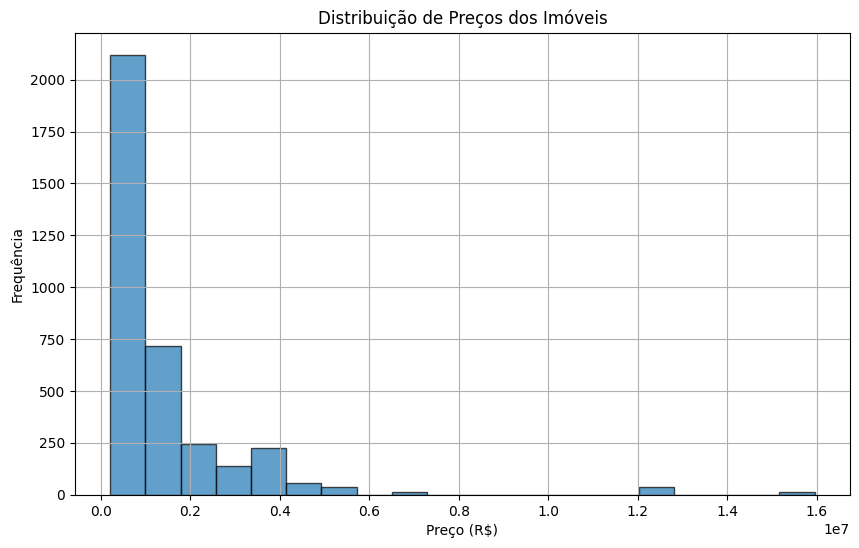

<Figure size 1000x600 with 0 Axes>

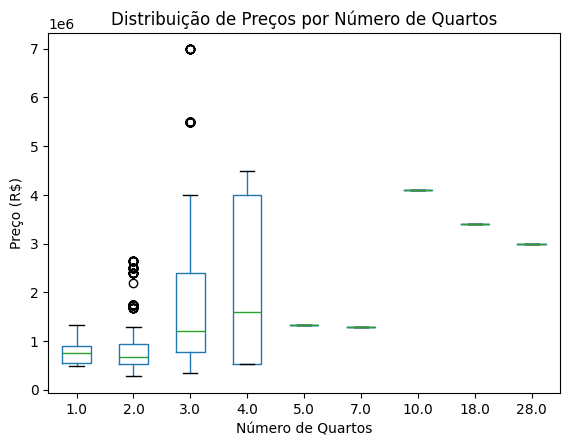

In [23]:
import matplotlib.pyplot as plt

df['Price_numeric'] = df['preco'].str.replace(r'[^\d,]', '', regex=True).str.replace(',', '.').astype(float)

# Area vs Price
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['Price_numeric'], alpha=0.5)
plt.title('Área vs Preço dos Imóveis')
plt.xlabel('Área (m²)')
plt.ylabel('Preço (R$)')
plt.grid(True)
plt.show()

# Histograma Preços
plt.figure(figsize=(10, 6))
plt.hist(df['Price_numeric'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribuição de Preços dos Imóveis')
plt.xlabel('Preço (R$)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Boxplot Preço número de Quartos
df['Bedrooms'] = pd.to_numeric(df['quartos'], errors='coerce')
plt.figure(figsize=(10, 6))
df.boxplot(column='Price_numeric', by='Bedrooms', grid=False)
plt.title('Distribuição de Preços por Número de Quartos')
plt.suptitle('')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço (R$)')
plt.show()
